`GHG All Scopes - done`

Description:
- The main database of GHG emissions for the 

Operations conducted:
- I took the log1p and created columns for missing values. Missing values are also set to zero. I believe the dataset is ready as is!


- ghg1: scope 1 emissions
- ghg2: scope 2 location and market
- ghg3: types of scope 3 emissions: instead of having missing values for each category with a total of 50 columns, I should consider having the total # of scope 3 sources and then the discrete total of the emissions
- Although real does not take into acount scope 3, I believe that the number and types of emissions can still be informative
- So the recap is that for scope 3 I will have two columns: count and discrete value. If all missing then missing.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# read the file into a dataframe
df = pd.read_stata('../../data/CDP Cleaning/cleaned outputs/cdp_ghg_all_scopes.dta')
df.shape

(34534, 26)

In [23]:
df.head()

,id,year,ghg1,ghg2location,ghg2market,ghg3_total,ghg3_business_travel,ghg3_capital_goods,ghg3_downstream_leased_assets,ghg3_downstream_trans,...,ghg3_purchased_g_and_s,ghg3_upstream_leased_assets,ghg3_upstream_trans,ghg3_use_of_sold_products,ghg3_waste,ghg3_processing_of_sold_products,ghg3_other_downstream,ghg3_other_upstream,ghg_total_market,ghg_total_location
0,44,2011.0,745.00,2537.00,NaN,4219.500000,4179.00,NaN,NaN,10.5,...,NaN,NaN,NaN,NaN,30.00,NaN,NaN,NaN,NaN,7501.500000
1,44,2012.0,580.00,1877.00,NaN,2546.199951,2520.00,NaN,NaN,8.2,...,NaN,NaN,NaN,NaN,18.00,NaN,NaN,NaN,NaN,5003.200195
2,44,2013.0,0.10,406.25,NaN,1662.089966,1647.46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.63,NaN,NaN,NaN,NaN,2068.439941
3,44,2014.0,28.02,275.20,NaN,901.599976,877.00,NaN,NaN,NaN,...,7.3,NaN,NaN,NaN,17.30,NaN,NaN,NaN,NaN,1204.819946
4,44,2016.0,252.40,854.20,544.4,3187.000000,3027.00,NaN,NaN,NaN,...,33.0,NaN,NaN,NaN,55.00,NaN,NaN,NaN,3983.800049,4293.600098


In [24]:
df.columns

Index(['id', 'year', 'ghg1', 'ghg2location', 'ghg2market', 'ghg3_total',
       'ghg3_business_travel', 'ghg3_capital_goods',
       'ghg3_downstream_leased_assets', 'ghg3_downstream_trans',
       'ghg3_employee_commuting', 'ghg3_end_of_life', 'ghg3_franchises',
       'ghg3_fuel_and_energy_related', 'ghg3_investments', 'ghg3_other',
       'ghg3_purchased_g_and_s', 'ghg3_upstream_leased_assets',
       'ghg3_upstream_trans', 'ghg3_use_of_sold_products', 'ghg3_waste',
       'ghg3_processing_of_sold_products', 'ghg3_other_downstream',
       'ghg3_other_upstream', 'ghg_total_market', 'ghg_total_location'],
      dtype='object')

In [25]:
ghg3df = df.iloc[:, ['ghg3' in x for x in df.columns.str.split('_')]]

## Counting the ghg3 types
Instead of having values for all the columns, I am counting the types of nonzero categories and only saving ghg3 total. 

In [26]:
# creating a counter for the number of ghg3 categories for each firm
df['ghg3_count'] = (np.sum(ghg3df > 0, axis=1) - 1).replace(-1, 0)

**Column Selection**

In [27]:
# select only relevant columns
# dropping ghg_toal_
df = df[['id', 'year', 'ghg1', 'ghg2location', 'ghg2market', 'ghg3_total', 'ghg3_count']]

In [28]:
# check duplicate rows with same id and year
df[df.duplicated(subset=['id', 'year'], keep=False)]



,id,year,ghg1,ghg2location,ghg2market,ghg3_total,ghg3_count


In [ ]:
# drop the rows without years
df = df.dropna(subset=['year'])

In [13]:
# count unique values in each column
df.nunique()

id              11275
year               13
ghg1            26031
ghg2location    25451
ghg2market       9254
ghg3_total      19644
ghg3_count         18
dtype: int64

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_7850/1089883729.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_7850/1089883729.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
/var/f

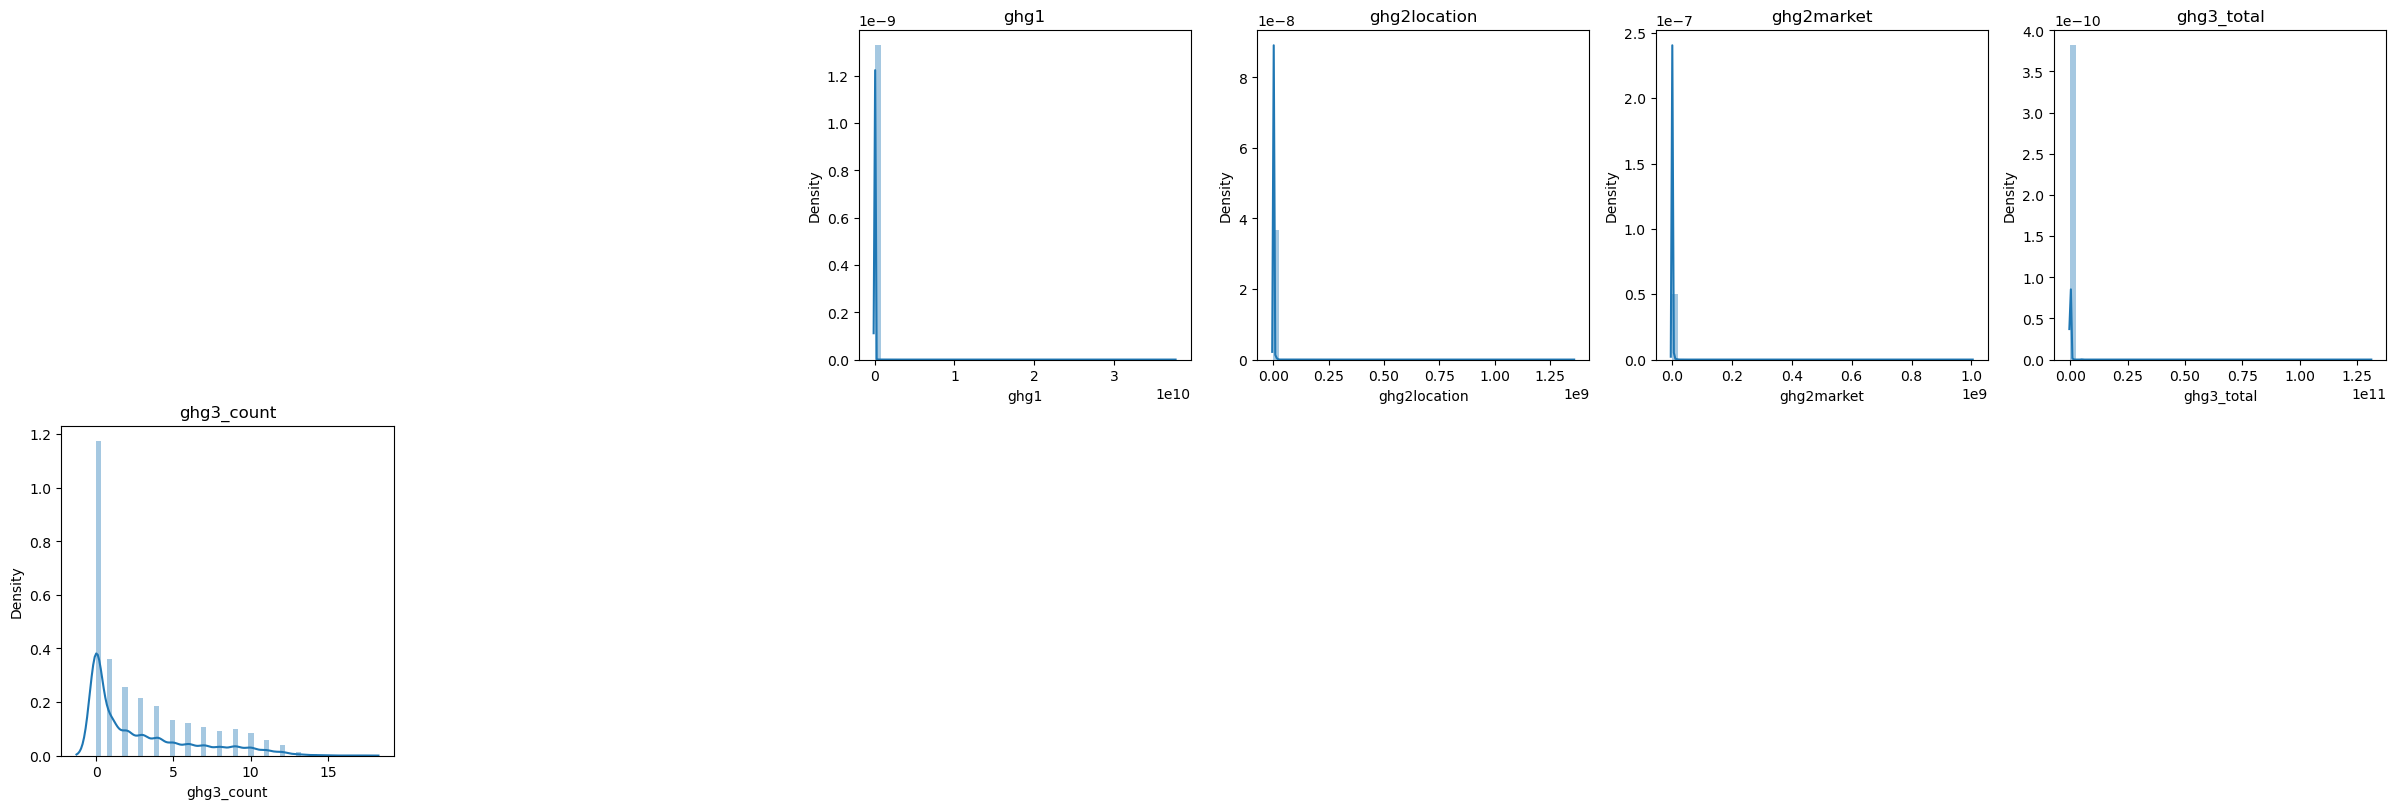

In [14]:
# do a distplot of all the columns but year and id in separate plots on a grid, use sns distplot, don't plot columns which have _na suffix
fig = plt.figure(figsize=(30, 30))
for i, col in enumerate(df.columns):
    if col not in ['id', 'year'] and not col.endswith('_na'):
        fig.add_subplot(6, 6, i+1)
        sns.distplot(df[col].dropna())
        plt.title(col)
plt.show()

In [15]:
# for all columns that are not id, year, ghg3_count set the na values to zero, create an indicator column for na values and take the log1p of the column
for col in df.columns:
    if col not in ['id', 'year', 'ghg3_count']:
        df[col + '_na'] = df[col].isnull().astype(int)
        df[col] = np.log1p(df[col].fillna(0))

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_7850/1089883729.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_7850/1089883729.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
/var/f

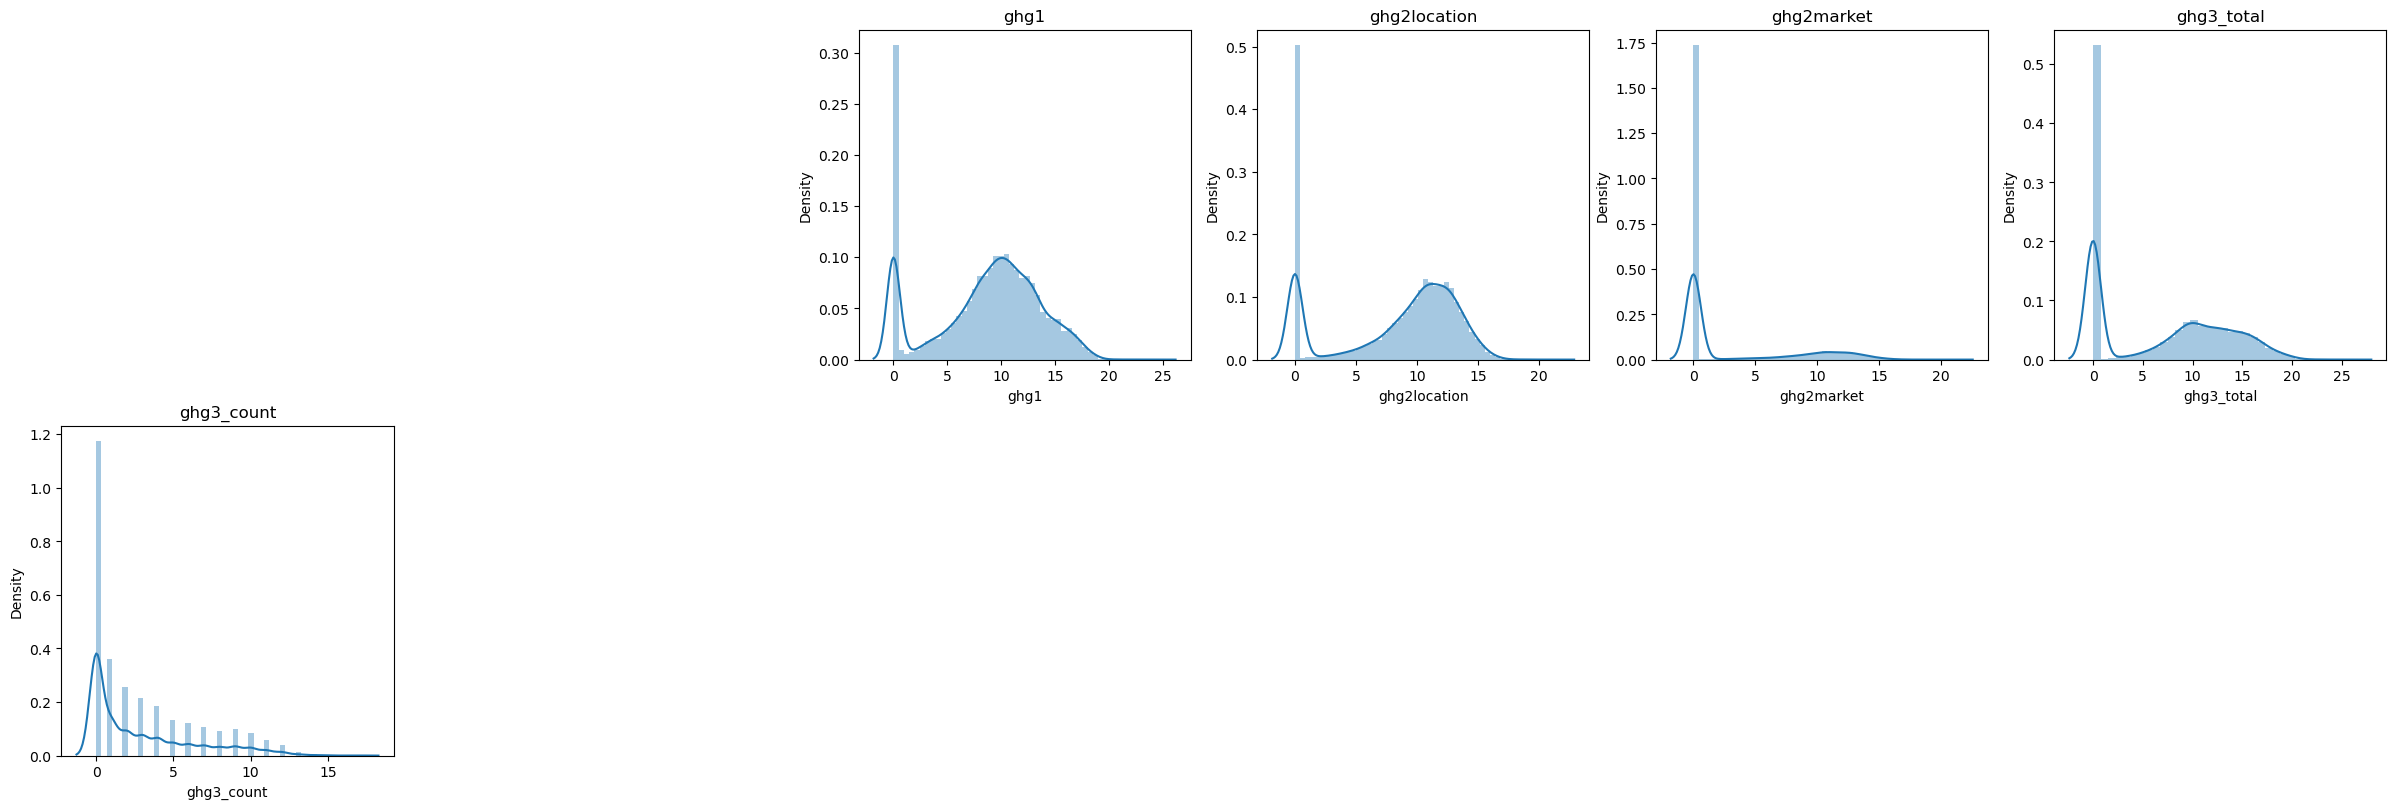

In [16]:
# do a distplot of all the columns but year and id in separate plots on a grid, use sns distplot, don't plot columns which have _na suffix
fig = plt.figure(figsize=(30, 30))
for i, col in enumerate(df.columns):
    if col not in ['id', 'year'] and not col.endswith('_na'):
        fig.add_subplot(6, 6, i+1)
        sns.distplot(df[col].dropna())
        plt.title(col)
plt.show()

In [17]:
# convert id, year to Int32
df['id'] = df['id'].astype('Int32')
df['year'] = df['year'].astype('Int32')
df.dtypes

id                   Int32
year                 Int32
ghg1               float64
ghg2location       float64
ghg2market         float64
ghg3_total         float32
ghg3_count           int64
ghg1_na              int64
ghg2location_na      int64
ghg2market_na        int64
ghg3_total_na        int64
dtype: object

## Final DF:

In [18]:
df

,id,year,ghg1,ghg2location,ghg2market,ghg3_total,ghg3_count,ghg1_na,ghg2location_na,ghg2market_na,ghg3_total_na
0,44,2011,6.614726,7.839132,0.000000,8.347709,3,0,0,1,0
1,44,2012,6.364751,7.537963,0.000000,7.842750,3,0,0,1,0
2,44,2013,0.095310,6.009427,0.000000,7.416432,2,0,0,1,0
3,44,2014,3.367985,5.621125,0.000000,6.805279,3,0,0,1,0
4,44,2016,5.534969,6.751335,6.301519,8.067149,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
34529,895873,2022,4.454347,5.720312,0.000000,9.111845,1,0,0,1,0
34530,895909,2022,14.310834,0.000000,14.619063,0.000000,0,0,1,0,0
34531,896044,2022,13.778149,0.000000,14.097396,0.000000,0,0,1,0,0
34532,896120,2022,8.104401,0.000000,0.000000,0.000000,0,0,1,1,0


In [19]:
df.columns

Index(['id', 'year', 'ghg1', 'ghg2location', 'ghg2market', 'ghg3_total',
       'ghg3_count', 'ghg1_na', 'ghg2location_na', 'ghg2market_na',
       'ghg3_total_na'],
      dtype='object')

In [273]:
# save to csv 
df.to_csv('../../data/processed/cdp_ghg_all_scopes_processed.csv', index=False)

In [274]:
df.isna().sum()

id                 0
year               0
ghg1               0
ghg2location       0
ghg2market         0
ghg3_total         0
ghg3_count         0
ghg1_na            0
ghg2location_na    0
ghg2market_na      0
ghg3_total_na      0
dtype: int64

In [275]:
df.shape

(34528, 11)